# <center>Quick start - пишем простое решение</center>

In [ ]:
!pip install catboost -q

In [25]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score#, mean_squared_error

In [3]:
!ls /kaggle/input/competative-data-science-course-by-data-feeling/

ls: cannot access '/kaggle/input/competative-data-science-course-by-data-feeling/': No such file or directory


## Анализируем данные о машинах car_info

(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
1101,G-1964724b,VW Polo,economy,petrol,5.68,2013,37671,2020,556.17,break_bug
2321,e40587429i,Skoda Rapid,economy,petrol,3.64,2017,125757,2018,3834.64,gear_stick
1127,p-8718312x,Renault Kaptur,standart,petrol,6.14,2011,2768,2016,939.51,engine_fuel
1845,J-2212008m,VW Polo VI,economy,petrol,5.40,2014,63384,2014,510.74,wheel_shake
932,R89114665D,Kia Rio X-line,economy,petrol,3.20,2013,45176,2021,632.61,engine_fuel


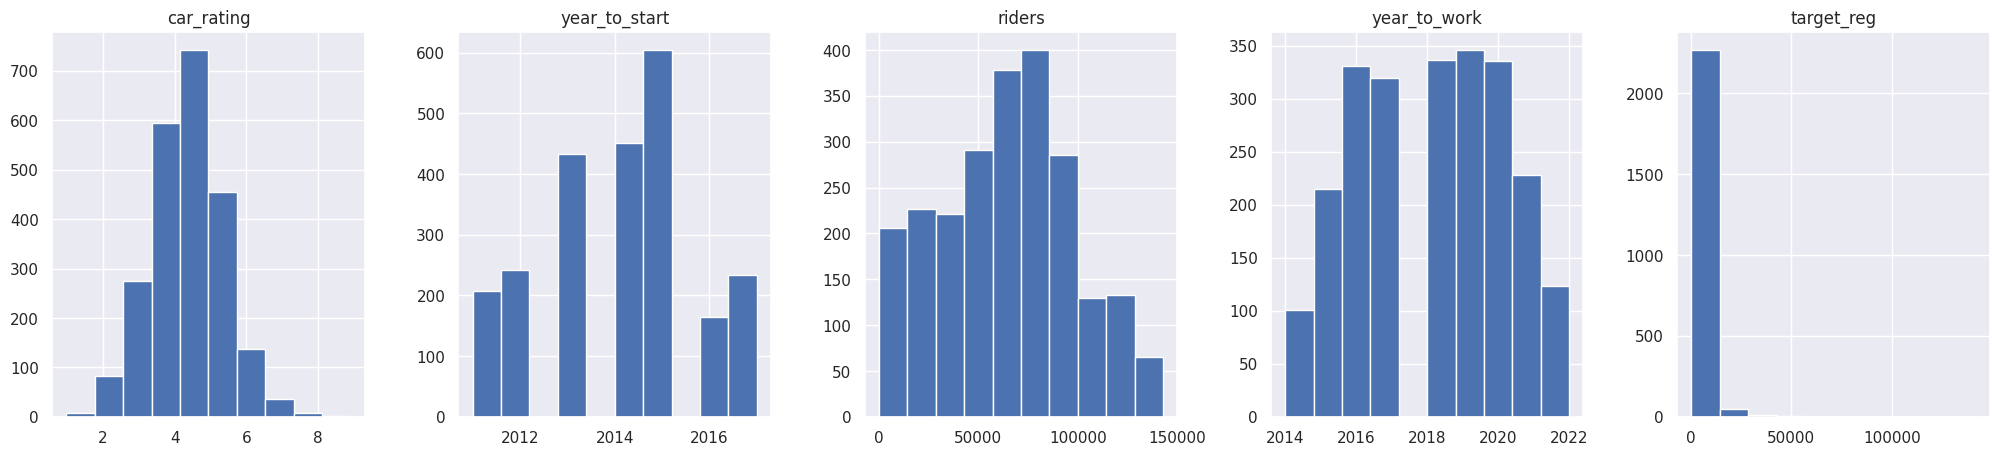

In [31]:
path = '../data/car_train.csv'
train = pd.read_csv(path)
print(train.shape)
train.hist(figsize=(25, 5), layout = (-1, 5))
train.sample(5)

In [32]:
path = '../data/car_test.csv'
test = pd.read_csv(path)
print(test.shape)
test.sample(5)

(1913, 8)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
1849,d10736354y,Kia Rio X,economy,petrol,4.28,2012,17847,2018
1416,A82111385d,Hyundai Solaris,economy,petrol,4.96,2014,66632,2016
1604,Q-2192864t,VW Tiguan,economy,petrol,4.64,2013,42329,2019
1112,d-1645612W,VW Tiguan,economy,petrol,4.36,2014,64689,2021
1097,i55328849i,Kia Rio X,economy,petrol,3.90,2014,62170,2022


## Классифицируем признаки на типы

In [33]:
features2drop = ['car_id'] 
targets = ['target_class', 'target_reg']  
cat_features = ['car_type', 'fuel_type', 'model'] 

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print('cat_features :', len(cat_features), cat_features)
print('num_features :', len(num_features), num_features)
print('targets', targets)

cat_features : 3 ['car_type', 'fuel_type', 'model']
num_features : 4 ['car_rating', 'year_to_start', 'riders', 'year_to_work']
targets ['target_class', 'target_reg']


## Обучаем Catboost и делаем прогноз на тест

In [34]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=cat_features)


clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

# инференс модели
y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

Learning rate set to 0.109335
0:	learn: 2.1911361	test: 2.1951349	best: 2.1951349 (0)	total: 5.62ms	remaining: 5.62s
150:	learn: 1.6539682	test: 2.2440578	best: 2.1908935 (6)	total: 765ms	remaining: 4.3s
300:	learn: 1.2455381	test: 2.3306861	best: 2.1908935 (6)	total: 1.6s	remaining: 3.72s
450:	learn: 0.9685364	test: 2.4038621	best: 2.1908935 (6)	total: 2.44s	remaining: 2.97s
600:	learn: 0.7432300	test: 2.4962387	best: 2.1908935 (6)	total: 3.3s	remaining: 2.19s
750:	learn: 0.5835086	test: 2.5783601	best: 2.1908935 (6)	total: 4.16s	remaining: 1.38s
900:	learn: 0.4589187	test: 2.6654857	best: 2.1908935 (6)	total: 5.01s	remaining: 551ms
999:	learn: 0.3990111	test: 2.7166606	best: 2.1908935 (6)	total: 5.57s	remaining: 0us

bestTest = 2.19089351
bestIteration = 6

Shrink model to first 7 iterations.

 Accuracy: 0.0876068376068376


In [35]:
test['target_class'] = clf.predict(test[filtered_features])
test[['car_id', 'target_class']].to_csv('simple_baseline_v1.csv', index=False)
print('CSV file saved!')

CSV file saved!


## Добавим информацию про поездки из rides_info

In [36]:
path = '../data/rides_info.csv'
rides = pd.read_csv(path)
rides.sample(5)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
210131,W72668469N,O23711712l,j1b,2020-02-29,4.52,34,538,32,43.000000,2,581.681841,0,-6.958273,34.653
119556,m12078042M,I-8740476B,W1g,2020-01-10,3.54,35,347,51,69.000000,0,1743.246320,0,-9.544314,-8.308
89481,g11301343J,G11530237Q,j1G,2020-01-24,4.39,431,4734,48,90.060961,1,2715.069200,0,-11.712689,7.703
729732,Q21392306Q,z-5067315t,Y1M,2020-03-20,3.15,517,6198,42,64.000000,2,1795.105806,0,41.197417,24.380
628366,N22200243S,s-8312774q,f1r,2020-01-28,4.81,11,116,33,67.727357,0,355.331064,0,-10.218859,-10.675


In [37]:
f = lambda x: x.nunique()
rides_df_gr = rides.groupby('car_id', as_index=False).agg(mean_rating = ('speed_avg', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'), 
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', f))


rides_df_gr.head(2)

,car_id,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,A-1049127W,49.459770,1.125753e+07,0.1,179.729652,-0.288229,174,172
1,A-1079539w,49.591954,1.912765e+07,0.1,184.505566,2.508746,174,173


In [38]:
def add_featues(df):
    
    if 'mean_rating' not in df.columns:
        return df.merge(rides_df_gr, on = 'car_id', how = 'left')
    
    return df
    
    
train = add_featues(train)
test = add_featues(test)

In [39]:
train.sample(2)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
2020,b-1731846p,Smart ForFour,economy,petrol,3.82,2015,76340,2016,3041.2,engine_overheat,50.620690,9.681598e+06,0.1,191.081915,-0.810000,174,172
1675,H-2071162e,Smart Coupe,economy,petrol,4.48,2015,73706,2020,782.5,gear_stick,45.913793,1.792018e+07,0.1,102.931010,-4.189964,174,171


In [46]:
train.to_csv('quickstart_train.csv', index=False)

# Снова обновляем типы фичей

In [48]:
filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print('num_features :', len(num_features), num_features)
print('cat_features :', len(cat_features), cat_features)
print('targets', targets)

num_features : 11 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
cat_features : 3 ['car_type', 'fuel_type', 'model']
targets ['target_class', 'target_reg']


# Обучаем Catboost на новых данных и делаем новый прогноз

In [42]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=cat_features)


clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

# инференс модели
y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

Learning rate set to 0.109335
0:	learn: 1.8867428	test: 1.8889315	best: 1.8889315 (0)	total: 6.43ms	remaining: 6.43s
150:	learn: 0.4109407	test: 0.6689167	best: 0.6685302 (142)	total: 1.03s	remaining: 5.8s
300:	learn: 0.2739907	test: 0.6757269	best: 0.6629107 (177)	total: 2.08s	remaining: 4.83s
450:	learn: 0.1950182	test: 0.6935761	best: 0.6629107 (177)	total: 3.15s	remaining: 3.84s
600:	learn: 0.1443841	test: 0.7192890	best: 0.6629107 (177)	total: 4.25s	remaining: 2.82s
750:	learn: 0.1105230	test: 0.7444843	best: 0.6629107 (177)	total: 5.37s	remaining: 1.78s
900:	learn: 0.0880207	test: 0.7643347	best: 0.6629107 (177)	total: 6.51s	remaining: 715ms
999:	learn: 0.0771231	test: 0.7761287	best: 0.6629107 (177)	total: 7.22s	remaining: 0us

bestTest = 0.6629106773
bestIteration = 177

Shrink model to first 178 iterations.

 Accuracy: 0.7222222222222222


In [47]:
fi = clf.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,speed_max,37.390452
1,mean_rating,29.276467
2,rating_min,12.776674
3,model,4.817885
4,car_type,4.339341
5,user_uniq,3.650003
6,user_ride_quality_median,1.742941
7,distance_sum,1.609484
8,riders,1.373459
9,car_rating,1.284999


In [45]:
test['target_class'] = clf.predict(test[filtered_features])
test[['car_id', 'target_class']].to_csv('../subs/simple_baseline_v2.csv', index=False)
print('CSV file saved!')

CSV file saved!


# Что дальше?

- Нажимаем `Save Version`
- Проверяем, что в `Advanced Settings` выбрано - всегда сохранять результаты ноутбука.
- Тип сохранения `Save & Run All (Commit)`
- Жмем окончательно кнопку `Save`